## create fa for TregDRs as test data.

```
cd ~/NGS_original/191103_hPBAT_Fr1-6_STR1.5.6.BDR1_Nova_mergeAll
samtools sort -@ 40 STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.bam \
-o STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam
samtools index STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam
samtools view -b STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.sort.bam chr12:56022890-56023199 > IKZF4.Treg.bam
samtools fasta -s -n IKZF4.Treg.bam > IKZF4.Treg.fa
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(100)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

pd.set_option('display.max_columns', 100)

from skbio import DNA
from skbio.alignment import local_pairwise_align_ssw

In [ ]:
1

In [ ]:
2+2

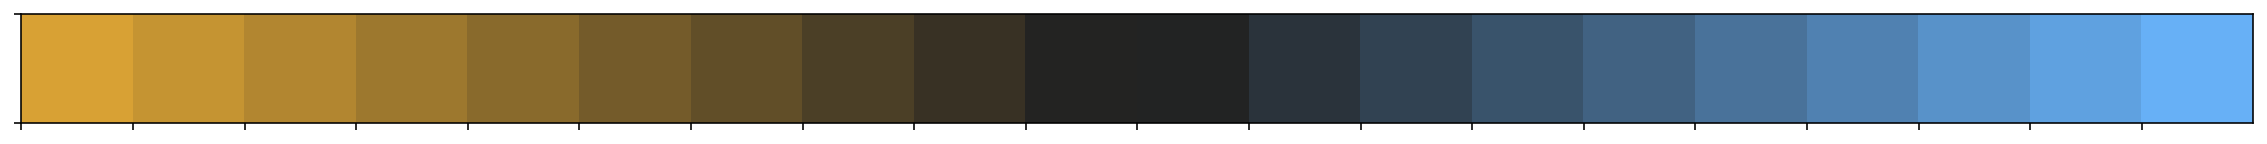

In [54]:
sns.palplot(sns.diverging_palette(55, 245, s=90, l=70, n=20, center="dark"))

In [34]:
from ipywidgets import interact, FloatSlider

def show_pal4(h_neg, h_pos, s, l, center):
    sns.palplot(sns.diverging_palette(h_neg, h_pos, n=24, s=s, l=l, center=center))
interact(show_pal4, h_neg=FloatSlider(220, max=360), h_pos=FloatSlider(20, max=360), 
         s=FloatSlider(75, max=99), l=FloatSlider(50, max=99), center=('light', 'dark'));

ValueError: ('light', 'dark') cannot be transformed to a widget

In [55]:
len('GTTTTTTGATTTTTTTTTTTGGTGTTTTTATTTTTAGCGTAGGGTAGTTTTATTTTTGGGTATTGTATGAGATGTTTAGATGATGTAGGAGATAGTATTTTGTATGGGGATTATACGTAGTTAGGGTGGGGTATTCGGGA')

140

In [ ]:
chr12 56022890 56023199 

In [ ]:
samtools view -b STR1_Fr2_R1.trim_bismark_bt2.deduplicated_2nd.bam chr12:56022890-56023199 | samtools fasta > IKZF4.TregDR.fa

In [58]:
s = "aa"

In [60]:
s += "a " + 't'

In [61]:
s

'aaa t'

In [ ]:
-D 20 -R 3 -N 0 -L 20 -i S,1,0.50b

In [ ]:
bismark --parallel 10 --output_dir ./static/tmp/job_20200613_204637 \
--temp_dir ./static/tmp/job_20200613_204637 --non_directional -N 1 -f \
--genome  ~/reference/bismark/Gencode_v34/fasta ./static/tmp/job_20200613_204637/input.fasta


In [62]:
'''CCCAGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCTACCATGCC
CGGATAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTGTTAGCCAGGATGGTCTCGATCTCCTG
ACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCG
CCCTCAGTGTTTCTAAGTGTACTTTTAAATATATTTTCCTCCACATAGCAAGTCGCTGGCCTCAAGAGGC
AGCCTCAGCCGAATAAGCTGGGACCAGTGA'''.replace('\n', '').replace('C', 'T')

'TTTAGGTTTATGTTATTTTTTTGTTTTAGTTTTTTGAGTAGTTGGGATTATAGGTGTTTGTTATTATGTTTGGATAATTTTTTGTATTTTTAGTAGAGATGGGGTTTTATTGTGTTAGTTAGGATGGTTTTGATTTTTTGATTTTGTGATTTGTTTGTTTTGGTTTTTTAAAGTGTTGGGATTATAGGTGTGAGTTATTGTGTTTGGTTGTTTTTAGTGTTTTTAAGTGTATTTTTAAATATATTTTTTTTTATATAGTAAGTTGTTGGTTTTAAGAGGTAGTTTTAGTTGAATAAGTTGGGATTAGTGA'

In [63]:
'''TCACTGGTCCCAGCTTATTCGGCTGAGGCTGCCTCTTGAGGCCAGCGACTTGCTATGTGGAGGAAAATATATTTAAA
AGTACACTTAGAAACACTGAGGGCGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGC
GGGCGGATCACGAGGTCAGGAGATCGAGACCATCCTGGCTAACACGGTGAAACCCCGTCTCTACTAAAAATACAAAAAA
TTATCCGGGCATGGTAGCGGGCGCCTGTAGTCCCAGTAGGGTAGTTTTGCTACTCGGGAGGCTGAGGCAGGAGAATGGCGTGAACCTGGG'''.replace('\n', '').replace('C', 'T')

'TTATTGGTTTTAGTTTATTTGGTTGAGGTTGTTTTTTGAGGTTAGTGATTTGTTATGTGGAGGAAAATATATTTAAAAGTATATTTAGAAATATTGAGGGTGGTTGGGTGTGGTGGTTTATGTTTGTAATTTTAGTATTTTGGGAGGTTGAGGTGGGTGGATTATGAGGTTAGGAGATTGAGATTATTTTGGTTAATATGGTGAAATTTTGTTTTTATTAAAAATATAAAAAATTATTTGGGTATGGTAGTGGGTGTTTGTAGTTTTAGTTATTTGGGAGGTTGAGGTAGGAGAATGGTGTGAATTTGGG'

## plot

In [88]:
f = '~/media32TB/bioinformatics/webapp_operation/BSviz/static/tmp/job_20210602_150512/bismark.matrix.csv'
# f = '~/media32TB/bioinformatics/webapp_operation/BSviz/static/tmp/job_20210604_172247/bismark.matrix.csv'
gene = 'FOXP3'

df_bismark = pd.read_csv(f, index_col=0)
df_bismark = df_bismark.reset_index().melt(value_name='meth', id_vars='read')
df_bismark.columns = ['read', 'pos', 'meth']
df_bismark['x'] = [list(df_bismark['pos'].unique()).index(x) for x in df_bismark['pos']]
df_bismark['y'] = [list(df_bismark['read'].unique()).index(x) for x in df_bismark['read']]

# df = df_bismark.melt(value_name='methylation')
# list_index = list(df_bismark.index)
# reads_num = list_index*(df_bismark.shape[1])
# df["read"]=reads_num

# df_0 = df[df.methylation==0.0]
# df_1 = df[df.methylation==1.0]
# df_N = df[df.isnull().any(axis=1)]

# data_2 = {
#     "pos":list(df_bismark.columns), 
#     "read":list(reversed(reads_num)),
#     "methylation":[0]*len(df.index)
# }

# df_mat_2 = pd.DataFrame(data_2)


In [89]:
df_bismark

,read,pos,meth,x,y
0,8-1-16_H02_23.seq,7583951,1.0,0,0
1,8-1-20_D03_12.seq,7583951,0.0,0,1
2,8-1-3_C01_07.seq,7583951,0.0,0,2
3,8-1-11_C02_08.seq,7583951,1.0,0,3
4,8-1-12_D02_11.seq,7583951,1.0,0,4
5,8-1-13_E02_14.seq,7583951,1.0,0,5
6,8-1-9_A02_02.seq,7583951,1.0,0,6
7,8-1-16_H02_23.seq,7583987,NaN,1,0
8,8-1-20_D03_12.seq,7583987,1.0,1,1
9,8-1-3_C01_07.seq,7583987,1.0,1,2


No handles with labels found to put in legend.


Text(0.5, 1.0, 'FOXP3')

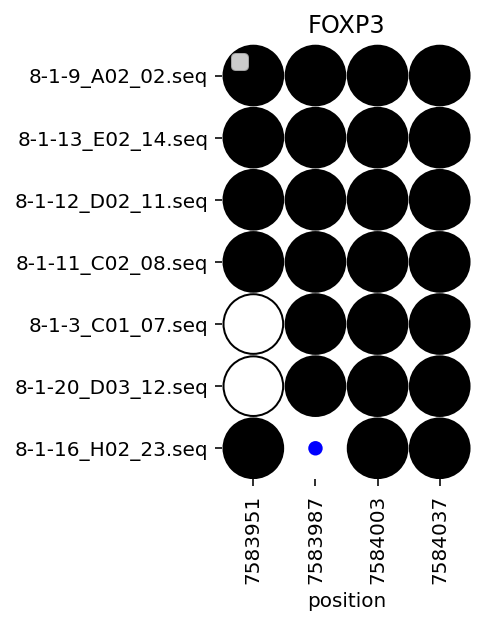

In [116]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

# fig, ax = plt.subplots(figsize=(len(df_bismark['pos'].unique()), len(df_bismark['read'].unique())))
fig, ax = plt.subplots()

for pos,row in df_bismark.iterrows():
    if row['meth'] == 1:
        circle_m = plt.Circle((row['x']+0.5, row['y']+0.5), 0.48, color='black', label='Methylated')
        ax.add_artist(circle_m)
    elif row['meth'] == 0:
        circle_u = plt.Circle((row['x']+0.5, row['y']+0.5), 0.48, color='black', fill=False)
        ax.add_artist(circle_u)
    else:
        circle_n = plt.Circle((row['x']+0.5, row['y']+0.5), 0.1, color='blue')
        ax.add_artist(circle_n)

ax.set_aspect(1)


from matplotlib.legend_handler import HandlerPatch

def make_legend_ellipse(legend, orig_handle,
                        xdescent, ydescent,
                        width, height, fontsize):
    p = mpatches.Ellipse(xy=(0.5*width-0.5*xdescent, 0.5*height-0.5*ydescent),
                         width = width+xdescent, height=(height+ydescent))

    return p

plt.legend([circle_m, circle_u, circle_n], ["Methylated", "Unmethylated", "Undetected"],
           handler_map={mpatches.Circle:HandlerPatch(patch_func=make_legend_ellipse),
                        })
# ax.legend(bbox_to_anchor=(1.1, 0.5), frameon=False, labelspacing=2, loc='upper left')
ax.legend(loc='upper left')
ax.spines["right"].set_color("none") 
ax.spines["left"].set_color("none")  
ax.spines["top"].set_color("none")   
ax.spines["bottom"].set_color("none")

ax.set_xlabel('position')
plt.xticks(rotation=90)
ax.set_xticks(np.arange(df_bismark['x'].max()+1)+0.5)
ax.set_xticklabels(df_bismark['pos'].unique())
ax.set_yticks(np.arange(df_bismark['y'].max()+1)+0.5)
ax.set_yticklabels(df_bismark['read'].unique())
ax.set_xlim(0,df_bismark['x'].max()+1)
ax.set_ylim(0,df_bismark['y'].max()+1)
ax.set_title(gene)

In [96]:
np.arange(df_bismark['x'].max())+0.5

array([0.5, 1.5, 2.5])

Text(0.5, 1.0, 'FOXP3')

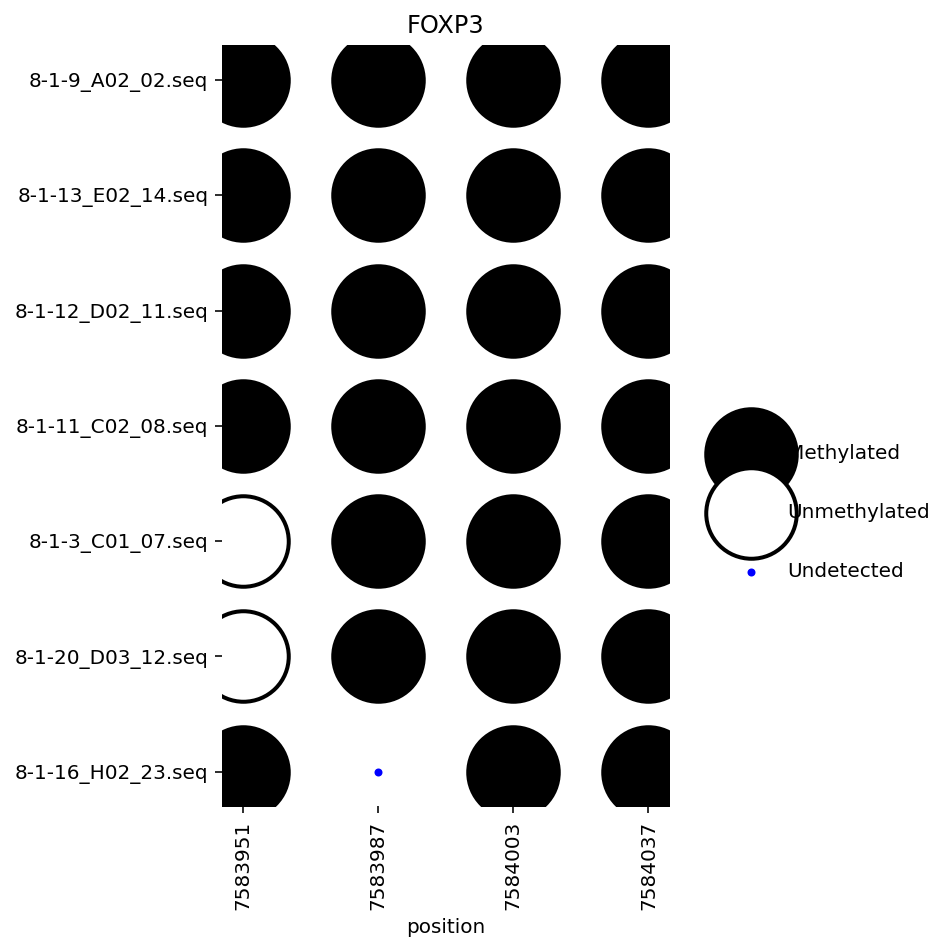

In [65]:
fig, ax = plt.subplots(figsize=(len(df_bismark['pos'].unique()), len(df_bismark['read'].unique())))

size = 2048
ax.scatter(x="pos", y="read", data=df_bismark, marker="", label=None)
ax.scatter(x="pos", y="read", data=df_bismark[df_bismark['meth']==1], s=size, linewidths='2', 
        c='#000000', edgecolors='black', label='Methylated')
ax.scatter(x="pos", y="read", data=df_bismark[df_bismark['meth']==0], s=size, linewidths='2', 
        c='#ffffff', edgecolors='black', label='Unmethylated')
ax.scatter(x="pos", y="read", data=df_bismark[df_bismark['meth'].isnull()], c='#0000ff', marker=".", label='Undetected')

ax.legend(bbox_to_anchor=(1.1, 0.5), frameon=False, labelspacing=2, loc='upper left')
ax.spines["right"].set_color("none") 
ax.spines["left"].set_color("none")  
ax.spines["top"].set_color("none")   
ax.spines["bottom"].set_color("none")

ax.set_xlabel('position')
plt.xticks(rotation=90)
# ax.set_ylim(-0.5,len(df_bismark['read'].unique()))
# ax.set_xlim(-1,len(df_bismark['pos'].unique()))
ax.set_title(gene)

In [14]:
df_bismark

pos,49260768,49260787,49260796,49260804,49260808,49260814,49260817,49260827,49260835,49260876,49260881
read,,,,,,,,,,,
Goto_2_G02_20.seq,1,1,1,1,1,1,1,1,1,1,1
Goto_2_F02_17.seq,1,1,1,1,1,1,1,1,1,1,1
Goto_2_B02_05.seq,1,1,0,1,1,1,1,1,1,1,1
